# Zan Merrill - ahm2452 - HW4
### academic disclaimer: I used chatGPT in parts of this to assist in code clarity and better understanding of topics.

# MIS 382N: Advanced Machine Learning Assignment 4

**Total points**: 55 pts

**Due**: 11:59 PM CST, Tuesday, November 4th, 2025.

**Submission**:
1. Submit your **Jupyter Notebook via Canvas**, AND
2. **Save your Jupyter Notebook to a PDF, and submit the PDF via Gradescope**.

You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas and Gradescope. But be sure to include the name and UT EID for both students.

Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

For questions involving mathematical derivations, you can write your answer on paper and then upload an image. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

**Name(s) and EID(s)**:

-------------------------

Bookmarks:

Q1. <a href=#Q1>Dimensionality Reduction - tSNE</a>

Q2. <a href=#Q2>Classification With a Loss Matrix</a>

Q3. <a href=#Q3>Visualizing the Confusion Matrices, ROC Curves, and PR Curves</a>

Q4. <a href=#Q4>Concepts about AU-ROC and AU-PRC</a>

-------------------------

**Q1. Dimensionality Reduction - tSNE** (15 pts) <a name='Q1' />

In this problem, you will apply Principal Component Analysis (PCA) to the Superconductivity Dataset. More details about the dataset are available [here](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#). The goal of this exercise is to characterize the structure of the input feature space.

Let's start with the following steps to prepare the dataset:

1. Load the dataset from the file `Q1_data.csv` into a pandas DataFrame named `df`.
2. The dataset contains a column called `critical_temp`, representing the critical temperature of each superconductor. Please select the column `critical_temp` as `y`.
**We will not use this column when fitting t-SNE. However, you may retain it later for visualization (e.g., coloring points by `y`).**
3. Define the feature matrix: select all remaining columns (except `critical_temp`) from `df` as `X`.
4. Standardize the features using [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler): Fit the scaler on `X`, and then transform `X` to obtain the standardized data. Apply scaling only to `X`, not to `y`.

Note: After this step, `X` should contain 81 features.


In [1]:
q1_path = "https://raw.githubusercontent.com/AHMerrill/ml-4/main/Q1_data.csv"
churn_path = "https://raw.githubusercontent.com/AHMerrill/ml-4/main/customer_churn_telcom.csv"

In [2]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv(q1_path)

In [4]:
df.head(3)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0


In [5]:
y = df["critical_temp"]
X = df.drop(columns=["critical_temp"])

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
X.shape

(21263, 81)

**Part 1.** (5 points) Now apply T-SNE to the dataset. You are required to carry out the following tasks:

1.   Initialize a t-SNE model with number of dimensions = 3, perplexity = 300, number of iterations = 300 and random state = 42.
2.   Apply the t-SNE model to the data.

**Answer**:

note:  here we're assuming the entire q1_data is the training data.  If a further test / train split is desired, it should be applied BEFORE the standard scaler

In [7]:
from sklearn.manifold import TSNE

### START CODE ###
## Initialize t-SNE with: n_components=3, perplexity=300, n_iter=300, random_state=42
tsne = TSNE(n_components=3, perplexity=300, n_iter=300, random_state=42)
### END CODE ###

### START CODE ###
## Apply t-SNE to the training dataset
X_tsne = tsne.fit_transform(X)
### END CODE ###

**Part 2**. (5 points) Sample 1000 random data points from the dataset, and show the 2D scatter plots of their first three t-SNE components.

**Answer**:

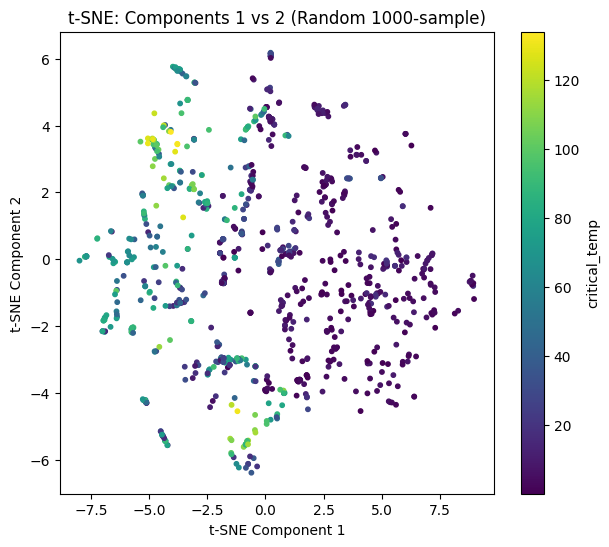

In [8]:
### START CODE ###
# Sample 1000 random data points from the dataset
# Plot first two components (2D scatter)
# Hint: Use X_tsne[:1000, 0] and X_tsne[:1000, 1] as x/y axes.
# Color by y

# Sample 1000 random data points from the dataset
# did not follow the hint here because the hint is not a random sample...
sample_idx = np.random.choice(len(X_tsne), size=1000, replace=False)
X_sample = X_tsne[sample_idx]
y_sample = y.iloc[sample_idx]

# Plot first two components (2D scatter)
plt.figure(figsize=(7,6))
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=y_sample, cmap='viridis', s=10)
plt.colorbar(label="critical_temp")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE: Components 1 vs 2 (Random 1000-sample)")
plt.show()
### END CODE ###

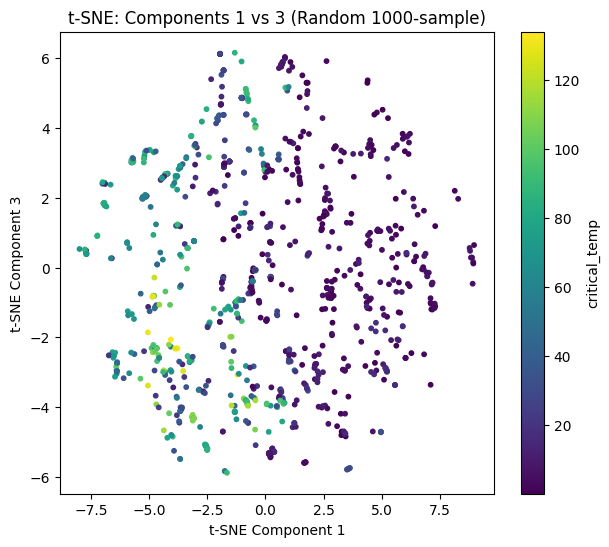

In [9]:
### START CODE ###
# Plot the first and the third components (2D scatter)
plt.figure(figsize=(7,6))
plt.scatter(X_sample[:, 0], X_sample[:, 2], c=y_sample, cmap='viridis', s=10)
plt.colorbar(label="critical_temp")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 3")
plt.title("t-SNE: Components 1 vs 3 (Random 1000-sample)")
plt.show()
### END CODE ###


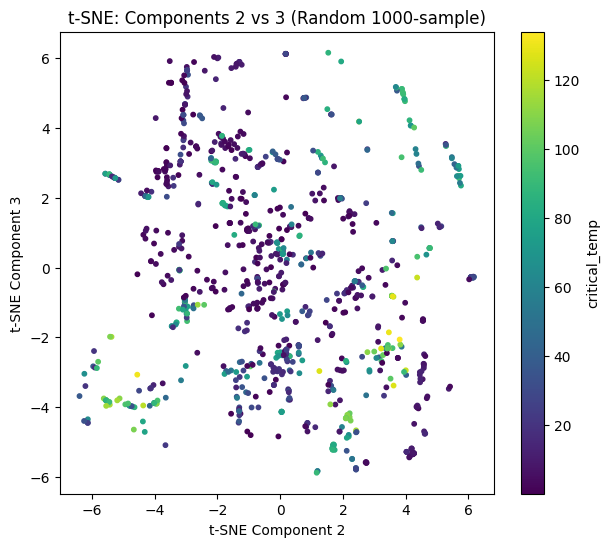

In [10]:
### START CODE ###
# Plot the second and the third components (2D scatter)
plt.figure(figsize=(7,6))
plt.scatter(X_sample[:, 1], X_sample[:, 2], c=y_sample, cmap='viridis', s=10)
plt.colorbar(label="critical_temp")
plt.xlabel("t-SNE Component 2")
plt.ylabel("t-SNE Component 3")
plt.title("t-SNE: Components 2 vs 3 (Random 1000-sample)")
plt.show()
### END CODE ###


In [11]:
!pip install plotly



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [12]:
### START CODE ###
# 3D interactive scatter plot of t-SNE components using Plotly
import plotly.express as px
import pandas as pd

# Build DataFrame from the sampled data
tsne_df = pd.DataFrame({
    'TSNE1': X_sample[:, 0],
    'TSNE2': X_sample[:, 1],
    'TSNE3': X_sample[:, 2],
    'critical_temp': y_sample.values
})

# Create interactive 3D scatter plot
fig = px.scatter_3d(
    tsne_df,
    x='TSNE1',
    y='TSNE2',
    z='TSNE3',
    color='critical_temp',
    color_continuous_scale='viridis',
    title='t-SNE 3D Visualization (Random 1000-sample)',
    height=700
)

# Adjust marker size and appearance
fig.update_traces(marker=dict(size=4, opacity=0.8))

# Set up a good initial camera angle and margins
fig.update_layout(
    scene=dict(
        xaxis_title='t-SNE Component 1',
        yaxis_title='t-SNE Component 2',
        zaxis_title='t-SNE Component 3',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.0))
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the interactive figure
fig.show()
### END CODE ###


## Note: in the code, there is a 3D t-SNE here but it doesn't render when saved as a pdf

**Part 3**. (5 points) Now we will plot the PCA and t-SNE projections of the data and compare the plots side-by-side to see the difference in scatters created by the two methods. You can use first 1000 data points for this.

**Answer**:

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
import pandas as pd

# --- 3D PCA ---
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X[sample_idx])

# --- Reuse existing 3D t-SNE results ---
X_tsne_3d = X_tsne[sample_idx]

# --- Build DataFrames for plotting ---
pca_df = pd.DataFrame({
    'X': X_pca_3d[:, 0],
    'Y': X_pca_3d[:, 1],
    'Z': X_pca_3d[:, 2],
    'critical_temp': y_sample.values
})
tsne_df = pd.DataFrame({
    'X': X_tsne_3d[:, 0],
    'Y': X_tsne_3d[:, 1],
    'Z': X_tsne_3d[:, 2],
    'critical_temp': y_sample.values
})

# --- Create side-by-side 3D subplots ---
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'scatter3d'}, {'type':'scatter3d'}]],
                    subplot_titles=('3D PCA', '3D t-SNE'))

# Left: PCA
fig.add_trace(
    go.Scatter3d(
        x=pca_df['X'], y=pca_df['Y'], z=pca_df['Z'],
        mode='markers',
        marker=dict(
            size=3,
            color=pca_df['critical_temp'],
            colorscale='viridis',
            opacity=0.8,
            colorbar=dict(title='critical_temp')
        ),
        name='PCA'
    ),
    row=1, col=1
)

# Right: t-SNE (reuse existing embedding)
fig.add_trace(
    go.Scatter3d(
        x=tsne_df['X'], y=tsne_df['Y'], z=tsne_df['Z'],
        mode='markers',
        marker=dict(
            size=3,
            color=tsne_df['critical_temp'],
            colorscale='viridis',
            opacity=0.8,
            showscale=False
        ),
        name='t-SNE'
    ),
    row=1, col=2
)

# Layout tweaks
fig.update_layout(
    height=700,
    margin=dict(l=0, r=0, b=0, t=50),
    title_text='3D PCA vs 3D t-SNE (Random 1000-sample)',
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1))
    ),
    scene2=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1))
    )
)

fig.show()


## Note: in the code there is a 3D PCA comparison to a 3D t-SNE here, but it doesn't render when saved as a pdf.  2D comparison is below

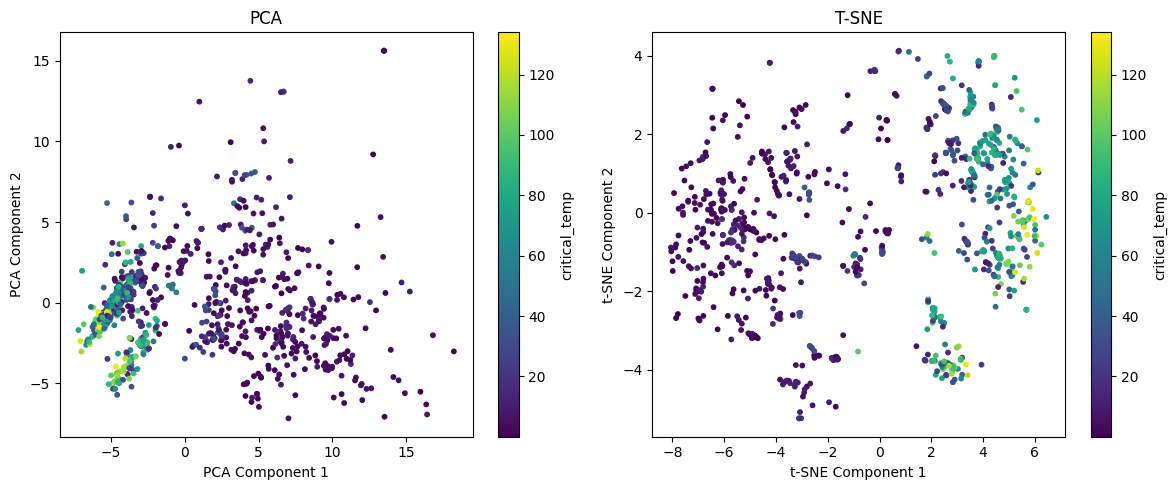

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

### START CODE ###
## Obtain components from PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X[sample_idx])
### END CODE ###

### START CODE ###
## Obtain components from t-SNE
tsne_2d = TSNE(n_components=2, perplexity=300, n_iter=300, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X[sample_idx])
### END CODE ###

# Plot side-by-side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('PCA')
### START CODE ###
## Left plot: scatter plot of PCA results for the first 1000 data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='viridis', s=10)
plt.colorbar(label='critical_temp')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
### END CODE ###

plt.subplot(1, 2, 2)
plt.title('T-SNE')
### START CODE ###
## Right plot: scatter plot of t-SNE results for the first 1000 data points
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y_sample, cmap='viridis', s=10)
plt.colorbar(label='critical_temp')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
### END CODE ###

plt.tight_layout()
plt.show()


**Q2. Classification With a Loss Matrix** (10 pts) <a name='Q2' />

Consider a binary classification problem with the following loss matrix:
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & r & c  \\
   & C2 & s & 0 & c \\
  \end{array} }
$$

where the cost of rejection is a constant, and the costs $r$ and $s$ are positive real numbers. Let $f(x)=P(C1|x)$.


**Part 1.** (2 points) Show that the expected loss when $x$ is predicted as $C_1$ is a decreasing function of $f(x)$ while expected loss when $x$ is predicted as $C_2$ is a increasing function of $f(x)$.

Hint: Express the expected losses with $f(x)$.

**Answer:**


In [15]:
from IPython.display import Image, display

url = "https://raw.githubusercontent.com/AHMerrill/ml-4/main/HW4_2_1.png"

# Resize by width or height (pixels)
display(Image(url=url, width=500))



**Part 2.** (2 points) If $c=0$, show that the decision that minimizes the expected loss is to reject all instances of $x$.

**Answer**:




In [16]:
from IPython.display import Image, display

url = "https://raw.githubusercontent.com/AHMerrill/ml-4/main/HW4_2_2.png"

# Resize by width or height (pixels)
display(Image(url=url, width=500))



**Part 3.** (3 points) Let $r=4$ and $s=3$, what is the minimum value of $c$ such that no instance of $x$ should be rejected under the optimal decision?

**Answer:**

In [17]:
from IPython.display import Image, display

url = "https://raw.githubusercontent.com/AHMerrill/ml-4/main/HW4_2_3.png"

# Resize by width or height (pixels)
display(Image(url=url, width=500))

**Part 4** (3 points) Let $r=6$, $s=3$, and $c=1$. Determine the  ranges of $f(x)$ for which the optimal decision is C1, reject and C2 respectively.

**Answer:**


In [18]:
from IPython.display import Image, display

url = "https://raw.githubusercontent.com/AHMerrill/ml-4/main/HW4_2_4.png"

# Resize by width or height (pixels)
display(Image(url=url, width=500))

**Q3. Visualizing the Confusion Matrices, ROC Curves, and PR Curves** (20 pts) <a name='Q3' />

In this question, we will train a logistic regression classifier and a multi-layer perceptron classifier on a binary classification problem. Then, we will visualize the confusion matrices, ROC Curves, and PR Curves as well as evaluating the AU-ROC and AP of these models.

In [19]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [20]:
!pip install --upgrade pandas


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [21]:
import pandas as pd
print(pd.__version__)


2.3.3


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

pd.set_option('future.no_silent_downcasting', True)

**Dataloading and Preprocessing**

In [23]:
df = pd.read_csv(churn_path, index_col = [0])

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [26]:
# Print out unique values of categorical columns
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [27]:
# Replace values of 'no internet service' and 'no phone service' with the value  'No'
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [28]:
# Change categorical columns with 2 categories to 0/1
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

df['gender'] = df['gender'].replace({'Female': 1, 'Male': 0})

for col in yes_no_columns + ['gender']:
    print(f'{col}: {df[col].unique()}')

Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
Churn: [0 1]
gender: [1 0]


In [29]:
# One hot encoding for categorical columns with more than two categories
df = pd.get_dummies(data = df, columns = ['InternetService','Contract','PaymentMethod'])
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [30]:
# Train test split
X = df.drop('Churn', axis='columns')
y = df.Churn.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [31]:
# Standardize numerical columns
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_val[cols_to_scale] = scaler.transform(X_val[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [32]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data
print('Churn occurences in the training set \n')
print(y_train.value_counts())
print('\n')
print('Churn occurences throughout the data \n')
print(y.value_counts())

Churn occurences in the training set 

Churn
0.0    3304
1.0    1196
Name: count, dtype: int64


Churn occurences throughout the data 

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64


**Part 1.** (5 points) In this part, train a **logistic regression model** for the churn prediction problem. Then, evaluate its AU-ROC and AP on **train, validation, and test sets**. Finally, visualize its confusion matrices on the **validation and test set** side by side. Use ```random_state=42``` for training your logistic regression model.

Helpful resources:
1. [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
3. [sklearn.metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

**Answer:**


# Default Threshold:

Logistic Regression Train AU-ROC: 0.853  Validation AU-ROC: 0.837  Test AU-ROC: 0.836
Logistic Regression Train AP: 0.673  Validation AP: 0.648  Test AP: 0.618

---- Default 0.5 Cutoff ----
Train       Precision: 0.669  Recall: 0.563  F1: 0.611  Accuracy: 0.810
Val         Precision: 0.610  Recall: 0.518  F1: 0.561  Accuracy: 0.784
Test        Precision: 0.636  Recall: 0.575  F1: 0.604  Accuracy: 0.800


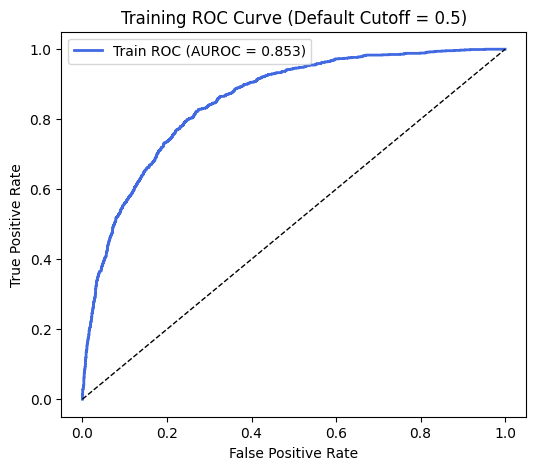

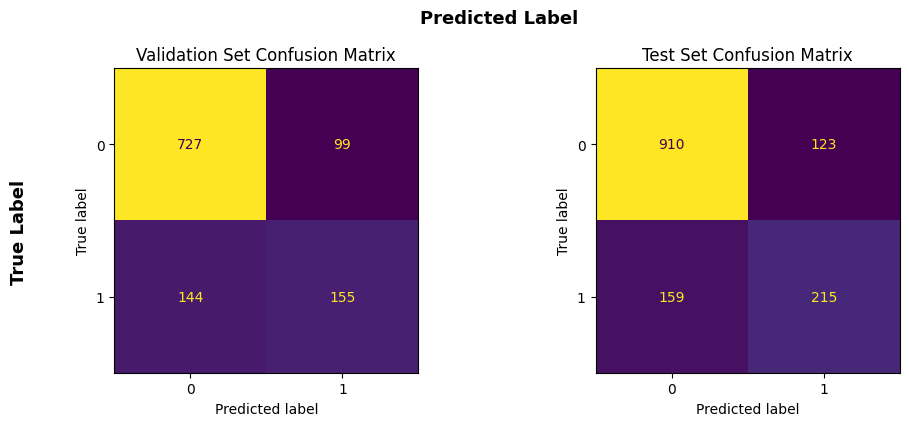

In [33]:
# --- Logistic Regression with Default 0.5 Cutoff ---
### START CODE ###
lr = LogisticRegression(random_state=42, max_iter=500)
lr.fit(X_train, y_train)

# Predicted probabilities
train_y_pred_score_lr = lr.predict_proba(X_train)[:, 1]
val_y_pred_score_lr   = lr.predict_proba(X_val)[:, 1]
test_y_pred_score_lr  = lr.predict_proba(X_test)[:, 1]

# AU-ROC and AP
train_auroc_lr = roc_auc_score(y_train, train_y_pred_score_lr)
val_auroc_lr   = roc_auc_score(y_val,   val_y_pred_score_lr)
test_auroc_lr  = roc_auc_score(y_test,  test_y_pred_score_lr)

train_ap_lr = average_precision_score(y_train, train_y_pred_score_lr)
val_ap_lr   = average_precision_score(y_val,   val_y_pred_score_lr)
test_ap_lr  = average_precision_score(y_test,  test_y_pred_score_lr)
### END CODE ###

print(f"Logistic Regression Train AU-ROC: {train_auroc_lr:.3f}  Validation AU-ROC: {val_auroc_lr:.3f}  Test AU-ROC: {test_auroc_lr:.3f}")
print(f"Logistic Regression Train AP: {train_ap_lr:.3f}  Validation AP: {val_ap_lr:.3f}  Test AP: {test_ap_lr:.3f}")

# --- Pointwise metrics ---
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve

def print_metrics(y_true, y_pred, label):
    p, r = precision_score(y_true, y_pred), recall_score(y_true, y_pred)
    f1, acc = f1_score(y_true, y_pred), accuracy_score(y_true, y_pred)
    print(f"{label:10s}  Precision: {p:.3f}  Recall: {r:.3f}  F1: {f1:.3f}  Accuracy: {acc:.3f}")

train_preds = (train_y_pred_score_lr >= 0.5).astype(int)
val_preds   = (val_y_pred_score_lr   >= 0.5).astype(int)
test_preds  = (test_y_pred_score_lr  >= 0.5).astype(int)

print("\n---- Default 0.5 Cutoff ----")
print_metrics(y_train, train_preds, "Train")
print_metrics(y_val,   val_preds,   "Val")
print_metrics(y_test,  test_preds,  "Test")

# --- ROC Curve (Training) ---
fpr, tpr, _ = roc_curve(y_train, train_y_pred_score_lr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, color="royalblue", label=f"Train ROC (AUROC = {train_auroc_lr:.3f})")
plt.plot([0,1],[0,1],'k--',lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Training ROC Curve (Default Cutoff = 0.5)")
plt.legend()
plt.show()

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay(confusion_matrix(y_val, val_preds)).plot(ax=axes[0], colorbar=False)
axes[0].set_title("Validation Set Confusion Matrix")
ConfusionMatrixDisplay(confusion_matrix(y_test, test_preds)).plot(ax=axes[1], colorbar=False)
axes[1].set_title("Test Set Confusion Matrix")
fig.text(0.5, 1.02, "Predicted Label", ha='center', fontsize=13, fontweight='bold')
fig.text(0.02, 0.5, "True Label", ha='center', va='center', rotation='vertical', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


# Training ROC adjusted threshold:


Optimal threshold based on training ROC: 0.254

Logistic Regression Train AU-ROC: 0.853  Validation AU-ROC: 0.837  Test AU-ROC: 0.836
Logistic Regression Train AP: 0.673  Validation AP: 0.648  Test AP: 0.618
---- ROC-Adjusted Cutoff ----
Train       Precision: 0.522  Recall: 0.828  F1: 0.640  Accuracy: 0.753
Val         Precision: 0.521  Recall: 0.793  F1: 0.629  Accuracy: 0.751
Test        Precision: 0.489  Recall: 0.802  F1: 0.607  Accuracy: 0.724


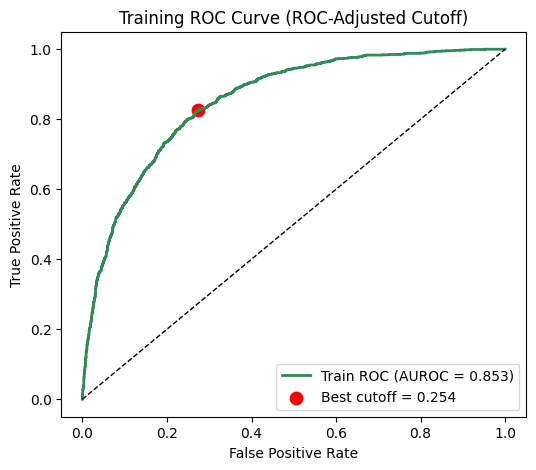

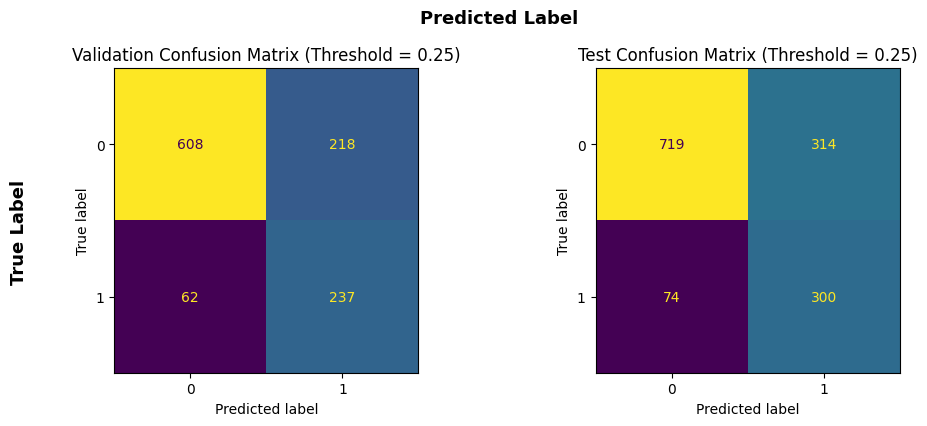

In [34]:
# --- Logistic Regression with ROC-Adjusted Cutoff ---
### START CODE ###
lr = LogisticRegression(random_state=42, max_iter=500)
lr.fit(X_train, y_train)

# Probabilities
train_y_pred_score_lr = lr.predict_proba(X_train)[:, 1]
val_y_pred_score_lr   = lr.predict_proba(X_val)[:, 1]
test_y_pred_score_lr  = lr.predict_proba(X_test)[:, 1]

# AU-ROC & AP
train_auroc_lr = roc_auc_score(y_train, train_y_pred_score_lr)
val_auroc_lr   = roc_auc_score(y_val,   val_y_pred_score_lr)
test_auroc_lr  = roc_auc_score(y_test,  test_y_pred_score_lr)
train_ap_lr = average_precision_score(y_train, train_y_pred_score_lr)
val_ap_lr   = average_precision_score(y_val,   val_y_pred_score_lr)
test_ap_lr  = average_precision_score(y_test,  test_y_pred_score_lr)

# Optimal threshold (Youden J)
fpr, tpr, thresholds = roc_curve(y_train, train_y_pred_score_lr)
j_scores = tpr - fpr
best_threshold = thresholds[np.argmax(j_scores)]
print(f"\nOptimal threshold based on training ROC: {best_threshold:.3f}\n")
### END CODE ###

print(f"Logistic Regression Train AU-ROC: {train_auroc_lr:.3f}  Validation AU-ROC: {val_auroc_lr:.3f}  Test AU-ROC: {test_auroc_lr:.3f}")
print(f"Logistic Regression Train AP: {train_ap_lr:.3f}  Validation AP: {val_ap_lr:.3f}  Test AP: {test_ap_lr:.3f}")

# --- Pointwise metrics ---
train_preds = (train_y_pred_score_lr >= best_threshold).astype(int)
val_preds   = (val_y_pred_score_lr   >= best_threshold).astype(int)
test_preds  = (test_y_pred_score_lr  >= best_threshold).astype(int)

print("---- ROC-Adjusted Cutoff ----")
print_metrics(y_train, train_preds, "Train")
print_metrics(y_val,   val_preds,   "Val")
print_metrics(y_test,  test_preds,  "Test")

# --- ROC Curve (Training) with Marker ---
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, color="seagreen", label=f"Train ROC (AUROC = {train_auroc_lr:.3f})")
plt.plot([0,1],[0,1],'k--',lw=1)
plt.scatter(fpr[np.argmax(j_scores)], tpr[np.argmax(j_scores)],
            color='red', s=80, label=f"Best cutoff = {best_threshold:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Training ROC Curve (ROC-Adjusted Cutoff)")
plt.legend()
plt.show()

# --- Confusion Matrices ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay(confusion_matrix(y_val, val_preds)).plot(ax=axes[0], colorbar=False)
axes[0].set_title(f"Validation Confusion Matrix (Threshold = {best_threshold:.2f})")
ConfusionMatrixDisplay(confusion_matrix(y_test, test_preds)).plot(ax=axes[1], colorbar=False)
axes[1].set_title(f"Test Confusion Matrix (Threshold = {best_threshold:.2f})")
fig.text(0.5, 1.02, "Predicted Label", ha='center', fontsize=13, fontweight='bold')
fig.text(0.02, 0.5, "True Label", ha='center', va='center', rotation='vertical', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


| Metric | Default 0.5 | ROC-Adjusted 0.25 | Change | Business Interpretation |
|---------|--------------|-------------------|---------|--------------------------|
| **Precision (Val)** | 0.610 | 0.521 | ↓ | More false positives — outreach costs increase |
| **Recall (Val)** | 0.518 | 0.793 | ↑ | Fewer churners missed — better customer retention coverage |
| **F1 (Val)** | 0.561 | 0.629 | ↑ | Better overall balance between precision and recall |
| **Accuracy (Val)** | 0.784 | 0.751 | ↓ | Lower overall correctness due to extra false positives |


# Tradeoff Implication
Lowering the cutoff from .5 (default) to .25 (ROC adjusted) causes the model to predict "churn" much more often.

Precision measures how many of the predicted churners actually churned, while recall measures how many actual churners were correctly identified. F1 balances these two, and accuracy reflects overall correctness. When lowering the threshold (e.g., from 0.5 to 0.25), recall rises because the model flags more positives, but precision and accuracy drop since more non-churners are incorrectly flagged. In business terms, this means catching more true churners (fewer missed opportunities to retain customers) at the cost of targeting more customers who would have stayed anyway. The preferred balance depends on whether the company prioritizes minimizing churn or avoiding unnecessary retention costs.

**Part 2a.** (3 points) In this part, we will train a **multi-layer perceptron** (MLP) for the churn prediction problem. For simplicity and consistency, use sklearn's ```MLPClassifier``` with ```random_state=42```. Before training the final MLP, first do hyper-parameter selection by validation average precision score.

Hint: Try out different ```hidden_layer_sizes``` and ```learning_rate_init``` configurations for ```MLPClassifier```.

Helpful resources:
1. [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
2. [sklearn.metrics.average_precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html)
3. [sklearn.model_selection.ParameterGrid](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html)

**Answer:**

In [35]:
# Define hyper-parameter search space, train models with different hyper-parameters,
# and record the best hyper-parameters and validation AP
### START CODE ###

# Define parameter grid
param_grid = {
    "hidden_layer_sizes": [(32,), (64,), (128,), (64, 32), (128, 64)],
    "learning_rate_init": [0.001, 0.01, 0.05]
}

best_val_ap_mlp = -np.inf
best_hparams_mlp = None

for params in ParameterGrid(param_grid):
    mlp = MLPClassifier(random_state=42,
                        max_iter=1000,
                        hidden_layer_sizes=params["hidden_layer_sizes"],
                        learning_rate_init=params["learning_rate_init"])
    mlp.fit(X_train, y_train)

    # Predict probabilities for validation set
    val_probs = mlp.predict_proba(X_val)[:, 1]
    val_ap = average_precision_score(y_val, val_probs)

    if val_ap > best_val_ap_mlp:
        best_val_ap_mlp = val_ap
        best_hparams_mlp = params

### END CODE ###

print(f"Best Hyper-parameters: {best_hparams_mlp}  Best Val Average Precision: {best_val_ap_mlp:.3f}")


Best Hyper-parameters: {'hidden_layer_sizes': (32,), 'learning_rate_init': 0.001}  Best Val Average Precision: 0.620


**Part 2b.** (2 points) Use your selected best hyper-parameters to train a final MLP. Then, evaluate its AU-ROC and AP on **train, validation, and test sets**. Finally, visualize its confusion matrices on the **validation and test set** side by side.

**Answer:**

MLP Train AU-ROC: 0.902  Validation AU-ROC: 0.822  Test AU-ROC: 0.820
MLP Train AP: 0.766  Validation AP: 0.620  Test AP: 0.598

---- Default 0.5 Cutoff ----
Train      Precision: 0.717  Recall: 0.665  F1: 0.690  Accuracy: 0.841
Val        Precision: 0.607  Recall: 0.559  F1: 0.582  Accuracy: 0.787
Test       Precision: 0.589  Recall: 0.575  F1: 0.582  Accuracy: 0.780


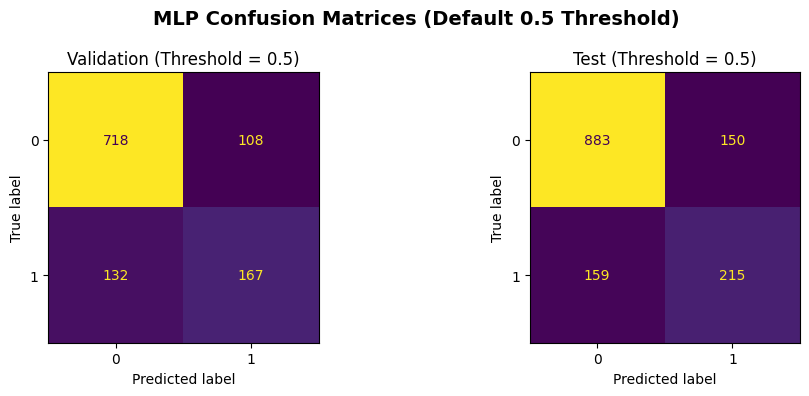

In [36]:
# Initialize and fit MLP
### START CODE ###
mlp_best = MLPClassifier(
    random_state=42,
    hidden_layer_sizes=(32,),
    learning_rate_init=0.001,
    max_iter=500
)
mlp_best.fit(X_train, y_train)
### END CODE ###


# Evaluate AU-ROC and AP on train/validation/test sets
### START CODE ###
# Predicted probabilities for the positive class (1)
train_y_pred_score_mlp = mlp_best.predict_proba(X_train)[:, 1]
val_y_pred_score_mlp = mlp_best.predict_proba(X_val)[:, 1]
test_y_pred_score_mlp = mlp_best.predict_proba(X_test)[:, 1]

# AU-ROC
train_auroc_mlp = roc_auc_score(y_train, train_y_pred_score_mlp)
val_auroc_mlp = roc_auc_score(y_val, val_y_pred_score_mlp)
test_auroc_mlp = roc_auc_score(y_test, test_y_pred_score_mlp)

# Average Precision (AP)
train_ap_mlp = average_precision_score(y_train, train_y_pred_score_mlp)
val_ap_mlp = average_precision_score(y_val, val_y_pred_score_mlp)
test_ap_mlp = average_precision_score(y_test, test_y_pred_score_mlp)
### END CODE ###

print(f"MLP Train AU-ROC: {train_auroc_mlp:.3f}  Validation AU-ROC: {val_auroc_mlp:.3f}  Test AU-ROC: {test_auroc_mlp:.3f}")
print(f"MLP Train AP: {train_ap_mlp:.3f}  Validation AP: {val_ap_mlp:.3f}  Test AP: {test_ap_mlp:.3f}")

# ---- Default 0.5 Cutoff ----
train_preds = (train_y_pred_score_mlp >= 0.5).astype(int)
val_preds = (val_y_pred_score_mlp >= 0.5).astype(int)
test_preds = (test_y_pred_score_mlp >= 0.5).astype(int)

def print_metrics(y_true, y_pred, split):
    p = precision_score(y_true, y_pred)
    r = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    print(f"{split:<10} Precision: {p:.3f}  Recall: {r:.3f}  F1: {f1:.3f}  Accuracy: {acc:.3f}")

print("\n---- Default 0.5 Cutoff ----")
print_metrics(y_train, train_preds, "Train")
print_metrics(y_val, val_preds, "Val")
print_metrics(y_test, test_preds, "Test")

# --- Confusion matrices ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay(confusion_matrix(y_val, val_preds)).plot(ax=axes[0], colorbar=False)
axes[0].set_title("Validation (Threshold = 0.5)")
ConfusionMatrixDisplay(confusion_matrix(y_test, test_preds)).plot(ax=axes[1], colorbar=False)
axes[1].set_title("Test (Threshold = 0.5)")
plt.suptitle("MLP Confusion Matrices (Default 0.5 Threshold)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


MLP Train AU-ROC: 0.902  Validation AU-ROC: 0.822  Test AU-ROC: 0.820
MLP Train AP: 0.766  Validation AP: 0.620  Test AP: 0.598

Optimal threshold based on training ROC: 0.312

---- ROC-Adjusted Cutoff ----
Train      Precision: 0.609  Recall: 0.844  F1: 0.708  Accuracy: 0.815
Val        Precision: 0.525  Recall: 0.716  F1: 0.605  Accuracy: 0.752
Test       Precision: 0.519  Recall: 0.749  F1: 0.613  Accuracy: 0.748


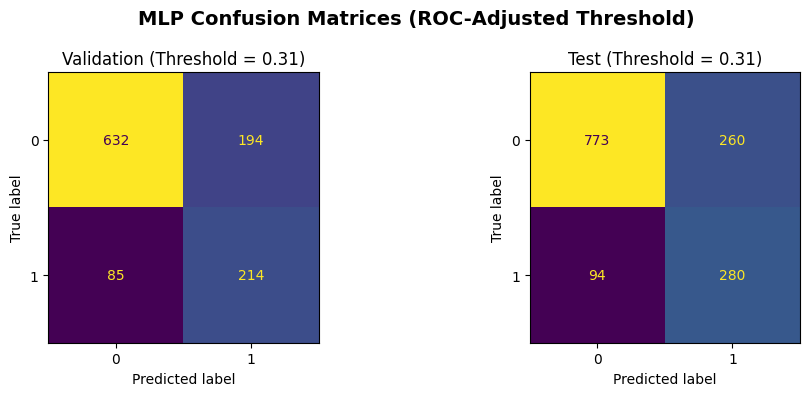

In [37]:
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, accuracy_score

# Initialize and fit MLP
### START CODE ###
mlp_best = MLPClassifier(
    random_state=42,
    hidden_layer_sizes=(32,),
    learning_rate_init=0.001,
    max_iter=1000
)
mlp_best.fit(X_train, y_train)
### END CODE ###

# Evaluate AU-ROC and AP on train/validation/test sets
### START CODE ###
train_y_pred_score_mlp = mlp_best.predict_proba(X_train)[:, 1]
val_y_pred_score_mlp = mlp_best.predict_proba(X_val)[:, 1]
test_y_pred_score_mlp = mlp_best.predict_proba(X_test)[:, 1]

# AU-ROC
train_auroc_mlp = roc_auc_score(y_train, train_y_pred_score_mlp)
val_auroc_mlp = roc_auc_score(y_val, val_y_pred_score_mlp)
test_auroc_mlp = roc_auc_score(y_test, test_y_pred_score_mlp)

# Average Precision (AP)
train_ap_mlp = average_precision_score(y_train, train_y_pred_score_mlp)
val_ap_mlp = average_precision_score(y_val, val_y_pred_score_mlp)
test_ap_mlp = average_precision_score(y_test, test_y_pred_score_mlp)
### END CODE ###

print(f"MLP Train AU-ROC: {train_auroc_mlp:.3f}  Validation AU-ROC: {val_auroc_mlp:.3f}  Test AU-ROC: {test_auroc_mlp:.3f}")
print(f"MLP Train AP: {train_ap_mlp:.3f}  Validation AP: {val_ap_mlp:.3f}  Test AP: {test_ap_mlp:.3f}")

# --- Determine optimal threshold based on training ROC curve ---
fpr, tpr, thresholds = roc_curve(y_train, train_y_pred_score_mlp)
j_scores = tpr - fpr
best_threshold = thresholds[np.argmax(j_scores)]
print(f"\nOptimal threshold based on training ROC: {best_threshold:.3f}")

# --- Apply threshold ---
train_preds = (train_y_pred_score_mlp >= best_threshold).astype(int)
val_preds = (val_y_pred_score_mlp >= best_threshold).astype(int)
test_preds = (test_y_pred_score_mlp >= best_threshold).astype(int)

# --- Compute pointwise metrics ---
def print_metrics(y_true, y_pred, split):
    p = precision_score(y_true, y_pred)
    r = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    print(f"{split:<10} Precision: {p:.3f}  Recall: {r:.3f}  F1: {f1:.3f}  Accuracy: {acc:.3f}")

print("\n---- ROC-Adjusted Cutoff ----")
print_metrics(y_train, train_preds, "Train")
print_metrics(y_val, val_preds, "Val")
print_metrics(y_test, test_preds, "Test")

# --- Confusion matrices ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay(confusion_matrix(y_val, val_preds)).plot(ax=axes[0], colorbar=False)
axes[0].set_title(f"Validation (Threshold = {best_threshold:.2f})")
ConfusionMatrixDisplay(confusion_matrix(y_test, test_preds)).plot(ax=axes[1], colorbar=False)
axes[1].set_title(f"Test (Threshold = {best_threshold:.2f})")
plt.suptitle("MLP Confusion Matrices (ROC-Adjusted Threshold)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


# once again, if you lower the threshold you will predict more positives.  This would be a good thing if not missing a churner is more important than creating false positives

### **MLP Test Performance Comparison**

| **Metric** | **Default Threshold (0.5)** | **ROC-Adjusted Threshold (0.312)** |
|:------------|:----------------------------:|:----------------------------------:|
| **AU-ROC** | 0.820 | 0.820 |
| **Average Precision (AP)** | 0.598 | 0.598 |
| **Precision** | 0.589 | 0.519 |
| **Recall** | 0.575 | 0.749 |
| **F1 Score** | 0.582 | 0.613 |
| **Accuracy** | 0.780 | 0.748 |
| **Threshold** | 0.5 | 0.312 |


**Part 3.** (3 points) Plot the ROC curves of the trained logistic regression and MLP models on the validation and test sets side by side. The left plot is for validation set and the right plot is for test set. Each plot consists of two ROC curves, one of the logistic regression model and one of the MLP. Please also display the AU-ROC (or AUC) to the **3rd decimal place** in the plot as well.

Helpful resources:
1. [sklearn.metrics.RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html)

**Answer:**


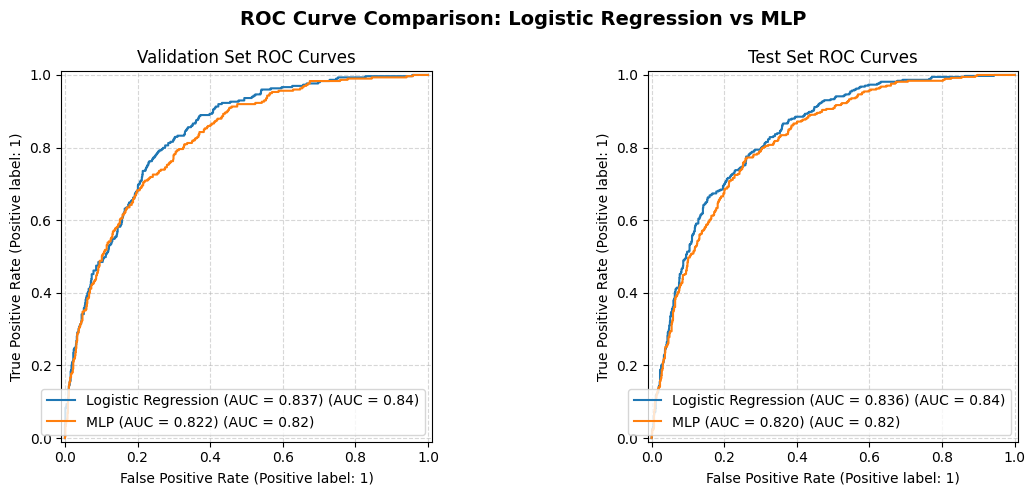

In [38]:
# Plot ROC curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

### START CODE ###

# --- Validation ROC ---
RocCurveDisplay.from_predictions(
    y_val,
    val_y_pred_score_lr,
    name=f"Logistic Regression (AUC = {val_auroc_lr:.3f})",
    ax=ax1
)
RocCurveDisplay.from_predictions(
    y_val,
    val_y_pred_score_mlp,
    name=f"MLP (AUC = {val_auroc_mlp:.3f})",
    ax=ax1
)
ax1.set_title("Validation Set ROC Curves")
ax1.legend(loc="lower right")
ax1.grid(True, linestyle="--", alpha=0.5)

# --- Test ROC ---
RocCurveDisplay.from_predictions(
    y_test,
    test_y_pred_score_lr,
    name=f"Logistic Regression (AUC = {test_auroc_lr:.3f})",
    ax=ax2
)
RocCurveDisplay.from_predictions(
    y_test,
    test_y_pred_score_mlp,
    name=f"MLP (AUC = {test_auroc_mlp:.3f})",
    ax=ax2
)
ax2.set_title("Test Set ROC Curves")
ax2.legend(loc="lower right")
ax2.grid(True, linestyle="--", alpha=0.5)

### END CODE ###

plt.suptitle("ROC Curve Comparison: Logistic Regression vs MLP", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


**Part 4.** (3 points) Plot the PR curves of the trained logistic regression and MLP models on the validation and test sets side by side. The left plot is for validation set and the right plot is for test set. Each plot consists of two PR curves, one of the logistic regression model and one of the MLP. Please also display the average precision (AP) to the **3rd decimal place** in the plot as well.

Helpful resources:
1. [sklearn.metrics.PrecisionRecallDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html)

**Answer:**

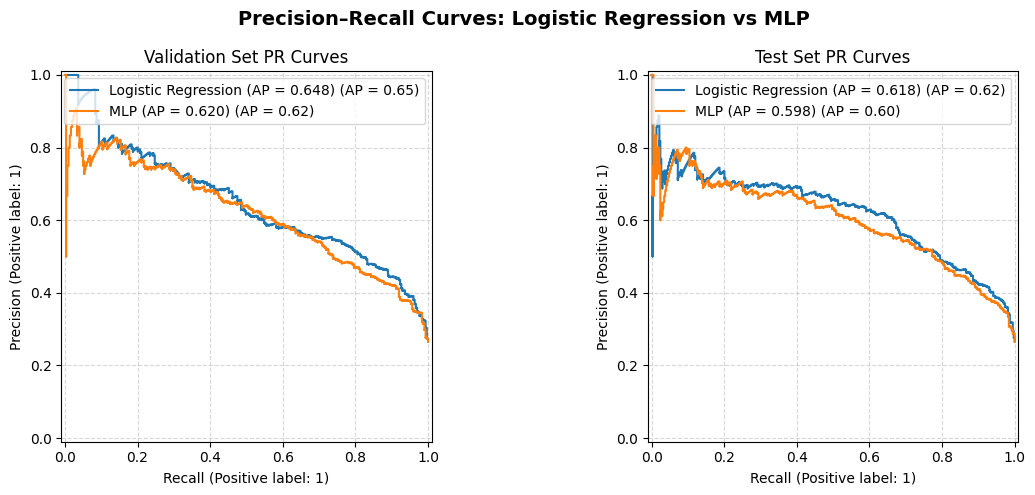

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

### START CODE ###

# --- Validation PR Curves ---
PrecisionRecallDisplay.from_predictions(
    y_val,
    val_y_pred_score_lr,
    name=f"Logistic Regression (AP = {val_ap_lr:.3f})",
    ax=ax1
)
PrecisionRecallDisplay.from_predictions(
    y_val,
    val_y_pred_score_mlp,
    name=f"MLP (AP = {val_ap_mlp:.3f})",
    ax=ax1
)
ax1.set_title("Validation Set PR Curves")
ax1.legend(loc="upper right")
ax1.grid(True, linestyle="--", alpha=0.5)

# --- Test PR Curves ---
PrecisionRecallDisplay.from_predictions(
    y_test,
    test_y_pred_score_lr,
    name=f"Logistic Regression (AP = {test_ap_lr:.3f})",
    ax=ax2
)
PrecisionRecallDisplay.from_predictions(
    y_test,
    test_y_pred_score_mlp,
    name=f"MLP (AP = {test_ap_mlp:.3f})",
    ax=ax2
)
ax2.set_title("Test Set PR Curves")
ax2.legend(loc="upper right")
ax2.grid(True, linestyle="--", alpha=0.5)

### END CODE ###

plt.suptitle("Precision–Recall Curves: Logistic Regression vs MLP", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


**Part 5.** (4 points) Briefly describe your takeaways from the plotted ROC and PR curves and how do the two models you trained compare.

**Answer:**

- ROC is showing the probability that the model ranks a random positive higher than a random negative. It shows how well the model separates the two classes overall. Logistic regression and MLP perform relatively similar, but logistic regression out-performs slightly. This suggests the data is closer to being linearly separable, and the non-linear ReLU of the MLP adds a complexity that hurts the model.

- The PR curve is typically more informative if the dataset is imbalance, and it shows how well the model maintains precision while trying to capture more positives. Here again, logistic regression slightly out-performs MLP, showing that it can capture more true positives without as many false alarms.


- Overall logistic regression is a simpler and more effective model.

**Q4. Concepts about AU-ROC and AU-PRC** (10 pts) <a name='Q4' />

**Part 1.** (4 points) Consider a binary classification problem and a no-skill random classifier $f(x)$ that outputs a number randomly sampled from $U[0,1]$ to be the predicted probability of $x$ being positive. In other words, the returned probability from $f(x)$ actually does not depend on $x$ (hence no-skill). Why is the Area Under the Preciison-Recall Curve (AU-PRC) of $f(x)$ the prior probability of the positive class, i.e. $P(y = 1)$?

HINT: Think about the definition of precision and recall, and how they relate to the decision threshold.

**Answer:**

A random classifier with no information about x assigns probabilities uniformly at random, so its predictions are independent of the true class labels.

by definition, precision = TP / (TP + FP) and recall = TP/(TP+FN)

for a no-skill classifier, the points predicted as positive at any threshold are just a random subset of all samples.  the expected fraction of true positives among them equals the overall fraction of positives in the dataset, P(y=1)

so, precision stays constant for all recall levels, making the curve a flat line and the area underneath is P(y=1), which is the prior probability of the positive class.

**Part 2.** (3 points) Consider the previous binary classification problem and classifier. Why is the Area Under the Receiver Operating Characteristic Curve (AU-ROC) of $f(x)$ $0.5$?

HINT: Think about the definition of true positive rate and false positive rate, and how they relate to the decision threshold.

**Answer:**

the roc curve depends only on the relative ranking of predicted scores.
a no-skill classifier has no relationship between its predicted scores and the true class labels, so it ranks positive and negative examples randomly—each is equally likely to receive a higher score.

as the decision threshold moves, the true-positive rate and false-positive rate both increase at about the same rate, producing points that fall along the diagonal line from (0,0) to (1,1).
the area under that diagonal is 0.5, showing the classifier has a 50 percent chance of ranking a randomly chosen positive higher than a randomly chosen negative.

it does not depend on class balance; even if the data is imbalanced, the roc curve stays diagonal because tpr and fpr scale together.

**Part 3.** (3 points) Why is AP a better metric than AU-ROC under an imbalanced binary classification problem where the positive instances are extremely rare compared to negative instances?

**Answer:**

even though AU-ROC itself doesn’t depend on class balance, it can overestimate performance in imbalanced datasets because the large number of negatives keeps the false-positive rate small.
AU-PRC (average precision) focuses only on the positive class, so it better reflects how well the model identifies rare positives without producing too many false alarms.